## 1 Hierarchical Clustering- 20 points
Given the following dataset shown in Figure 1, please answer the following
questions. Please answer the following questions. You may either solve by
hand, typeset, or creating python script:
1. Show the dendrogram resulting from the single-link hierarchical agglomerative
clustering approach using the L1 − norm as the distance between
two points.
2. Show the merge order tree and table, stopping when you have k = 4 (hint:
Slide 11, Lecture 10). Merge the clusters by taking the minimum feature
values of data points.
3. Cluster the dataset using bisecting k-Means with k = 4 and plot the
dataset with the corresponding cluster assignments.
4. How do the results of the hierarchical agglomerative clustering compare
with the clustering of bisecting k-Means for this dataset? Do the two
clustering approaches achieve the same results? Clearly discuss the results
for each algorithm and include quantitative/qualitative assessments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs, load_iris

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Generate some sample data
D = np.array([
    [5, 8],
    [6, 7],
    [6, 5],
    [2, 4],
    [3, 4],
    [5, 4],
    [7, 4],
    [9, 4],
    [3, 3],
    [8, 2],
    [7, 5]
])

DF = pd.DataFrame(D)
DF = DF.rename(columns = {0:'Feature_1', 1:'Feature_2'})
Index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

DF

,Feature_1,Feature_2
0,5,8
1,6,7
2,6,5
3,2,4
4,3,4
5,5,4
6,7,4
7,9,4
8,3,3
9,8,2


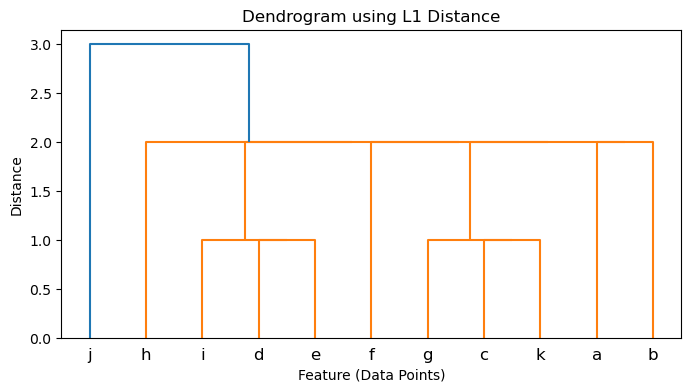

In [3]:
# Generating the distance matrix with L1 norm
d_matrix = pdist(DF, metric='cityblock')  

# Performing Hierarchical Clustering 
linkage_matrix = linkage(d_matrix, method='single')      

# Plotting the dendograms
plt.figure(figsize=(8, 4))                               
dendrogram(linkage_matrix, labels = Index, leaf_rotation=0)
plt.xlabel('Feature (Data Points)')
plt.ylabel('Distance')
plt.title('Dendrogram using L1 Distance')
plt.show()

Text(0, 0.5, 'feature 2')

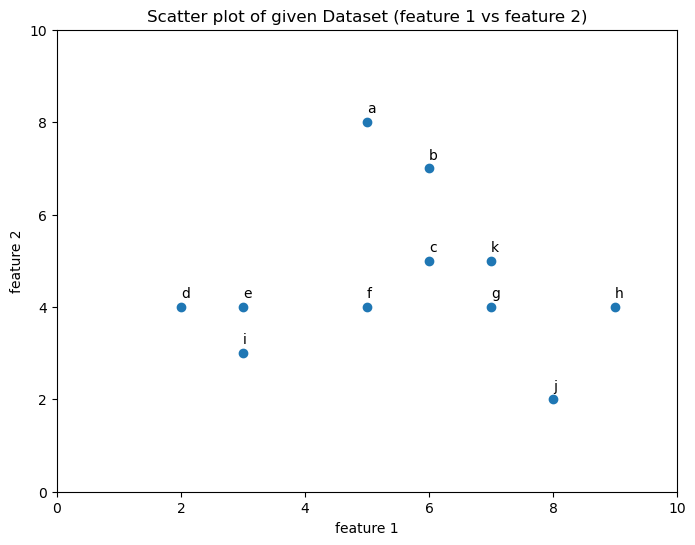

In [11]:
X = DF['Feature_1'].to_numpy()
Y = DF['Feature_2'].to_numpy()

#Plotting the given dataset
plt.figure(figsize=(8, 6))          
plt.title('Scatter plot of given Dataset (feature 1 vs feature 2)')
plt.scatter(DF.Feature_1, DF.Feature_2)
for i in range(len(X)): 
    plt.annotate( Index[i], (X[i], Y[i] + 0.2))

plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

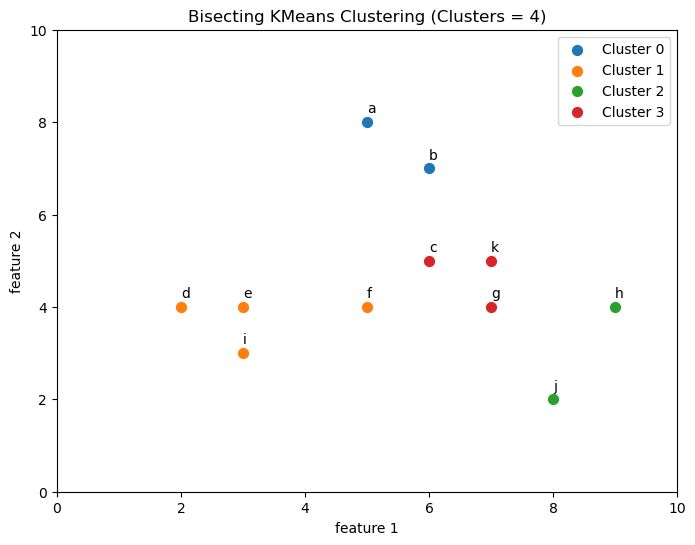

In [33]:
from sklearn.cluster import BisectingKMeans

bisect_means = BisectingKMeans(n_clusters=4).fit(D)
cluster_labels = bisect_means.labels_


plt.figure(figsize=(8, 6))
for cluster_id in np.unique(cluster_labels):
    cluster_data = D[cluster_labels == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', s=50)
    
for i in range(len(X)): 
    plt.annotate( Index[i], (X[i], Y[i] + 0.2))

plt.title('Bisecting KMeans Clustering (Clusters = 4)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.show()


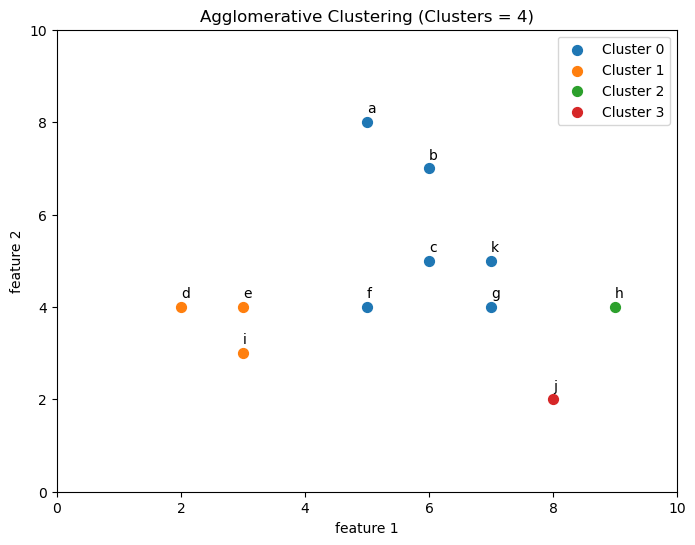

In [34]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

#Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=4, linkage = 'single', affinity = 'cityblock').fit(D)
cluster_labels = clustering.labels_

plt.figure(figsize=(8, 6))
for cluster_id in np.unique(cluster_labels):
    cluster_data = D[cluster_labels == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', s=50)
    
for i in range(len(X)): 
    plt.annotate( Index[i], (X[i], Y[i] + 0.2))

plt.title('Agglomerative Clustering (Clusters = 4)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.show()



In [35]:
clustering.labels_

array([0, 0, 0, 1, 1, 0, 0, 2, 1, 3, 0], dtype=int64)

In [36]:
bisect_means.labels_

array([0, 0, 3, 1, 1, 1, 3, 2, 1, 2, 3])

In [38]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(clustering.labels_, bisect_means.labels_)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.3119266055045872


This score is positive. It means that there is some agreement between the two clustering methods, more than what would be expected by random chance. However, since the score is closer to 0 than to 1, it shows that the agreement between the two clustering results is moderate to low.

Discussion:
1. The two clustering approaches do not achieve the same results for this dataset. While they both identify 4 clusters, the assignment of data points to these clusters differs significantly.
2. Agglomerative clustering tends to create one large cluster (Cluster 0 with 6 elements) and two singleton clusters. This suggests that it might be identifying one main group and treating some points as outliers or highly distinct cases.
3. Bisecting K-Means, on the other hand, creates more balanced clusters, with sizes ranging from 2 to 4 elements. This suggests a more even partitioning of the data space, which might be preferable if you expect roughly equal-sized groups in your data.
4. The moderate ARI score (0.3119) confirms that while there is some agreement between the two methods, they produce notably different clusterings.
5. The agglomerative method seems to be more sensitive to potential outliers, as evidenced by the singleton clusters. Bisecting K-Means appears to be forcing these points into larger clusters, which might be beneficial if outliers are not a primary concern in your analysis.
6. The two methods agree on only a few point assignments, indicating that they are capturing different aspects of the data structure. This could be due to the inherent differences in how these algorithms work:
- Agglomerative clustering builds a hierarchy from the bottom-up
- Bisecting K-Means recursively splits clusters from the top-down

## 3 Mean Shift Clustering - 10 points
Please access the Iris Flower Dataset via Sklearn and select the following two
attributes: petal length and petal width.
1. Use Mean Shift to cluster the data with bandwidth = 1 (use the default
settings of the algorithm in Sklearn).
(a) Plot the two features with the associated class labels for each data
point.
(b) Plot the two features with the associated cluster labels for each data
point.
(c) Report the Silhouette index for the resulting clustering assignments.
2. Compare the initial bandwidth clustering results with the clustering results
of the bandwidth estimation function is Sklearn.
(a) Report the estimated bandwidth value.
(b) Plot the two features with the associated cluster labels for each data
point using the bandwidth from the estimation function.
(c) Which bandwidth leads to the “optimal” clustering for the dataset?
Justify your answer.

In [40]:
from sklearn import datasets
iris = datasets.load_iris()

Iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)     

Iris_df['species'] = iris.target   
Iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [41]:
Iris_df = Iris_df[["petal length (cm)", "petal width (cm)", "species"]]

Iris_df


,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [42]:
Target_names = dict(enumerate(iris['target_names']))
Target_names

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

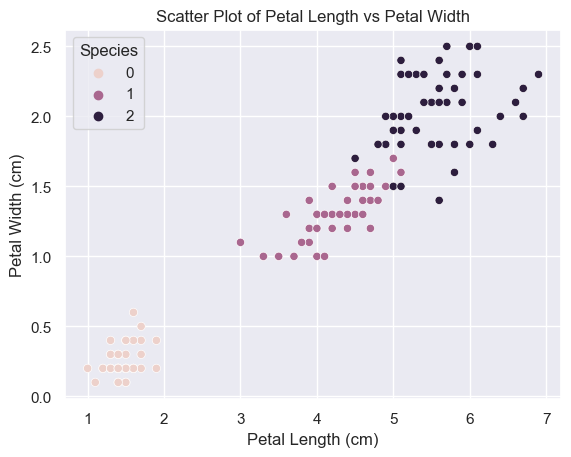

In [43]:
sns.set(style="darkgrid")
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="species", data=Iris_df)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Scatter Plot of Petal Length vs Petal Width")
plt.legend(title="Species")
plt.show()

In [44]:
df = iris.data

iris_df = df[:, 2:4]         

meanshift = MeanShift(bandwidth=1)         
meanshift.fit(iris_df)

cluster_labels = meanshift.labels_                 
cluster_centers = meanshift.cluster_centers_       

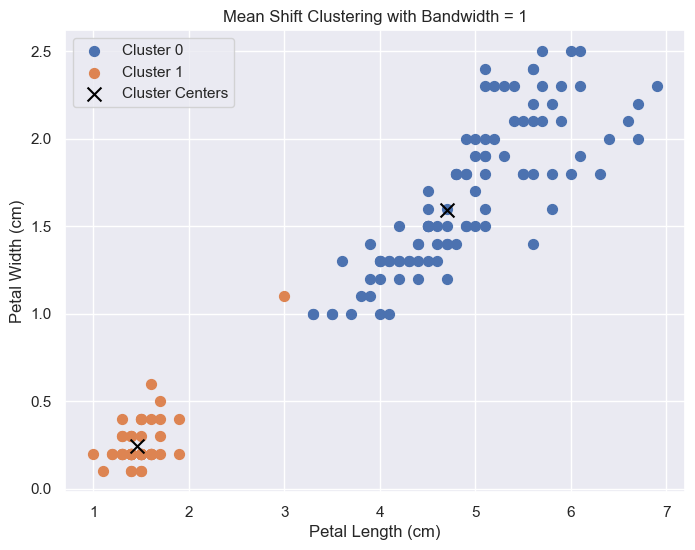

In [46]:
#Plotting the data with the associated cluster labels
plt.figure(figsize=(8, 6))                         
for cluster_id in np.unique(cluster_labels):
    cluster_data = iris_df[cluster_labels == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', s=50)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', label='Cluster Centers', s=100)
plt.title(f'Mean Shift Clustering with Bandwidth = 1')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

In [47]:
#Calculating the Silhouette Score
from sklearn.metrics import silhouette_score                     

silhouette_avg = silhouette_score(iris_df, cluster_labels)
print(f"Silhouette Score for mean shift clustering: {silhouette_avg:.2f}")

Silhouette Score for mean shift clustering: 0.77


In [48]:
# Calculating the estimated bandwidth
data = iris.data                          

dset = data[:, 2:4]

estimated_bandwidth = estimate_bandwidth(dset)
print(f"Estimated Bandwidth: {estimated_bandwidth:.2f}")

Estimated Bandwidth: 0.73


In [49]:
data = iris.data

dset = data[:, 2:4]              

estimated_bandwidth = estimate_bandwidth(dset)

meanshift_estimated = MeanShift(bandwidth=estimated_bandwidth)          
meanshift_estimated.fit(dset)

cluster_label = meanshift_estimated.labels_                            
cluster_centers = meanshift_estimated.cluster_centers_                  

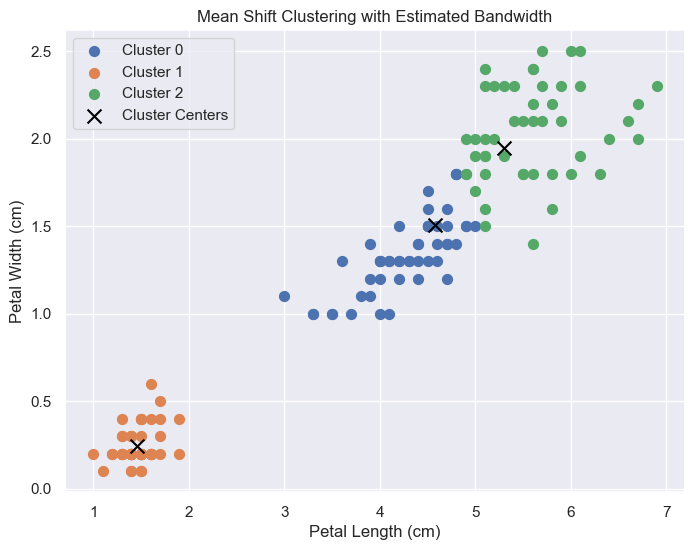

In [50]:
# Plot the dataset with associated cluster labels
plt.figure(figsize=(8, 6))
for cluster_id in np.unique(cluster_label):
    cluster_data = dset[cluster_label == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', s=50)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', label='Cluster Centers', s=100)
plt.title(f'Mean Shift Clustering with Estimated Bandwidth')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

In [51]:
silhouette_avg = silhouette_score(iris_df, cluster_label)
print(f"Silhouette Score for estimated bandwidth: {silhouette_avg:.2f}")

Silhouette Score for estimated bandwidth: 0.66


Estimated bandwith clustering leads to the optimal clustering of the dataset because for the given species - 3 the estimated band width clustered it in 3 clusters while the Mean shift clustering clustered it in 2 clusters.

## 4 Bayesian and Nearest Neighbor Classification-
10 points
You will be implementing two different types of classifiers to distinguish between
species of rock crabs of genus Leptograpsus. Please download the dataset
provided along with this assignment: Assignment 3 Dataset.txt. The dataset is
composed of 200 samples of different crab specimens. There are five features
that were captured for each specimen. These features include anatomical properties:
the front lip, rear width, length, width, and depth of the crab. Your goal
is to discriminate between the two species of crab using these provided features
(total of 5). The species of crab are given as binary labels in the first column
of the provided dataset. The remaining five columns of data are the real-valued
features. You will be considering two classifiers: Gaussian Naive Bayes and
k-Nearest Neighbors (KNN).

Please answer the following questions by creating python script to implement
the classifiers:

1. Break apart the observations into training and testing sets. Use the first
70% of the data for training (first 140 samples) and the remaining 30% of
the data for testing (remaining 60 samples). Use the default setting for
each classifier and provide the following:
(a) Training set confusion matrix
(b) Testing set confusion matrix
(c) Test accuracy, precision, recall, f1 score

2. Compare the performance of the two classifiers for the crab dataset. What
are the advantages and disadvantages of each classifier?

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [58]:
df = pd.read_csv('Assignment_3_Dataset.txt', sep='\t', header=0)
df.head(5)

,Species,FrontalLip,RearWidth,Length,Width,Depth
0,0,20.6,14.4,42.8,46.5,19.6
1,1,13.3,11.1,27.8,32.3,11.3
2,0,16.7,14.3,32.3,37.0,14.7
3,1,9.8,8.9,20.4,23.9,8.8
4,0,15.6,14.1,31.0,34.5,13.8


In [60]:
X = df[['FrontalLip', 'RearWidth', 'Length', 'Width', 'Depth']].to_numpy()
Y = df[['Species']].to_numpy()

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, shuffle = False)

### Gaussian Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

predict_X_train = gnb.predict(X_train)
 
con_matrix_train = confusion_matrix(Y_train, predict_X_train)
con_matrix_train

array([[47, 25],
       [28, 40]], dtype=int64)

In [63]:
predict_X_test = gnb.predict(X_test)
 
con_matrix_test = confusion_matrix(Y_test, predict_X_test)
con_matrix_test

array([[19,  9],
       [14, 18]], dtype=int64)

In [64]:
print('Accuracy Score:', accuracy_score(Y_test, predict_X_test))
print('Precision Score:', precision_score(Y_test, predict_X_test))
print('Recall Score:', recall_score(Y_test, predict_X_test))
print('F1 Score:', f1_score(Y_test, predict_X_test))

Accuracy Score: 0.6166666666666667
Precision Score: 0.6666666666666666
Recall Score: 0.5625
F1 Score: 0.6101694915254238


### K Nearest Neighbours

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

predict_X_train1 = knn.predict(X_train)
con_matrix_train = confusion_matrix(Y_train, predict_X_train1)
con_matrix_train

array([[67,  5],
       [ 2, 66]], dtype=int64)

In [66]:
predict_X_test1 = knn.predict(X_test)
 
con_matrix_test = confusion_matrix(Y_test, predict_X_test1)
con_matrix_test

array([[23,  5],
       [ 3, 29]], dtype=int64)

In [67]:
print('Accuracy Score:', accuracy_score(Y_test, predict_X_test1))
print('Precision Score:', precision_score(Y_test, predict_X_test1))
print('Recall Score:', recall_score(Y_test, predict_X_test1))
print('F1 Score:', f1_score(Y_test, predict_X_test1))

Accuracy Score: 0.8666666666666667
Precision Score: 0.8529411764705882
Recall Score: 0.90625
F1 Score: 0.8787878787878787


Here for K nearest neighbours the F1 score, accuracy score, precision score and recall score, all are higher than that of the Gaussian bayes'. Hence KNN performs better than Gaussian Naive Bayes.

#### KNN 

Advantages 
1. KNN is intuitive and simple. It has no assumptions.
2. It is very easy to implement for multiclass problems and can be used for both classification and regression.

Disadvantages
1. KNN is a slow algorithm.
2. Imbalance data in KNN causes problems.


#### GNB 

Advantages
1. Fast and flexible model gives highly reliable results.
2. Works well with large dataset.

Disadvantages
1. Large data record are required to achieve good results.
2. Sometimes shows lower performance than other classifiers.